
# Extremely Randomized Trees Classifier


+ basic sklearn calls
+ variance comparison with random forest


In [1]:
import numpy as np
import pylab as plt
from sklearn import svm
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier


from tqdm import tqdm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
# getdata
import pandas as pd
df=pd.read_csv('../datasets/CAD-PTSDData.csv',index_col=0)
y=df.iloc[:,0]
X=df.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
y_train.shape



(212,)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clf = RandomForestClassifier(max_depth=10, class_weight='balanced',n_estimators=1000)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clf.predict_proba(X_test)
y_pred_insample=clf.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 152 points : 29
Accuracy:  0.8092105263157895 AUC oos:  0.8778431372549019 AUC in sample:  1.0


In [4]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
clfx = ExtraTreesClassifier(max_depth=10, class_weight='balanced',n_estimators=1000)


clfx.fit(X_train, y_train)

y_pred = clfx.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (y_test.shape[0],(y_test != y_pred).sum()))

acc=clf.score(X_test,y_test)
y_pred=clfx.predict_proba(X_test)
y_pred_insample=clfx.predict_proba(X_train)
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred[:,1], pos_label=1)
fpr_insample, tpr_insample, thresholds_insample = metrics.roc_curve(y_train,y_pred_insample[:,1], pos_label=1)
auc=metrics.auc(fpr, tpr)
auc_insample=metrics.auc(fpr_insample, tpr_insample)

print('Accuracy: ',acc,'AUC oos: ',auc,'AUC in sample: ',auc_insample)

Number of mislabeled points out of a total 152 points : 30
Accuracy:  0.8092105263157895 AUC oos:  0.8709803921568627 AUC in sample:  1.0


In [5]:
clf.estimators_[:5]

[DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1302313023),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1942446286),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=675313663),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1400398511),
 DecisionTreeClassifier(max_depth=10, max_features='auto',
                        random_state=1534617093)]

# Show that RF and EX has simialr bias but EX has smaller variance

In [6]:
MISS=[]
for clf_ in tqdm(clf.estimators_):
    y_pred = clf_.predict(X_test)
    MISS=np.append(MISS,(y_test != y_pred).sum())

100%|██████████| 1000/1000 [00:03<00:00, 302.60it/s]


In [7]:
MISSx=[]
for clf_ in tqdm(clfx.estimators_):
    y_pred = clf_.predict(X_test)
    MISSx=np.append(MISSx,(y_test != y_pred).sum())


100%|██████████| 1000/1000 [00:03<00:00, 295.79it/s]


5.015701745518767 4.612578888214271


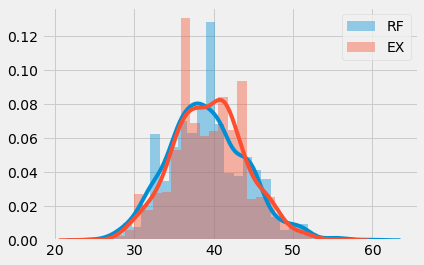

In [8]:
sns.distplot(MISS)
ax=sns.distplot(MISSx)
ax.legend(['RF','EX'])
print(MISS.std(),MISSx.std())